In [427]:
#Imported seaborn
import seaborn as sea
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st

In [428]:
data = pd.read_csv('/content/bank-additional-full.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [429]:
# 2nd step Find the sum of missing values
data.duplicated().sum() #Here we have 12 duplicate datas

np.int64(12)

In [430]:
# 3rd step Remove the duplicated value
data.drop_duplicates(inplace=True)

In [431]:
# 4th step check if duplicate values are removed
data.duplicated().sum()

np.int64(0)

In [432]:
# 5th step check in data for another values
data.info()
# Here we have no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [433]:
data.isnull().mean()*100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
day_of_week,0.0


In [434]:
# Check the skewness of numerical data
numerical = data.select_dtypes("number")
for i in numerical:
  print("Skewness of ",i,"is",numerical[i].skew())

Skewness of  age is 0.7845602604159753
Skewness of  duration is 3.2628075094947224
Skewness of  campaign is 4.76204406111779
Skewness of  pdays is -4.921386382079702
Skewness of  previous is 3.831395514122408
Skewness of  emp.var.rate is -0.7240605917385105
Skewness of  cons.price.idx is -0.23085290676680506
Skewness of  cons.conf.idx is 0.3028760001292554
Skewness of  euribor3m is -0.7091942125590542
Skewness of  nr.employed is -1.0443170571755054


       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  eurib

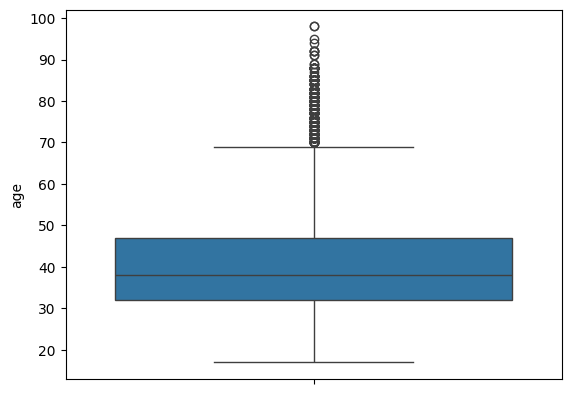

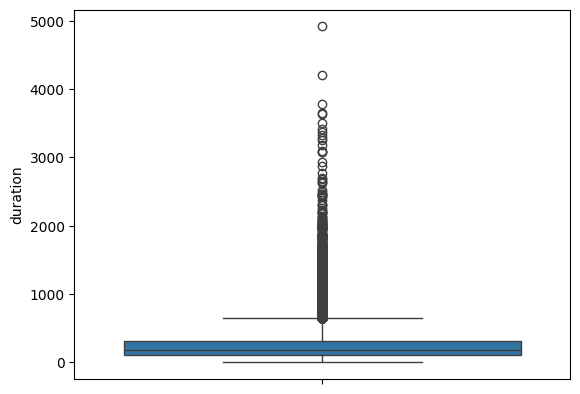

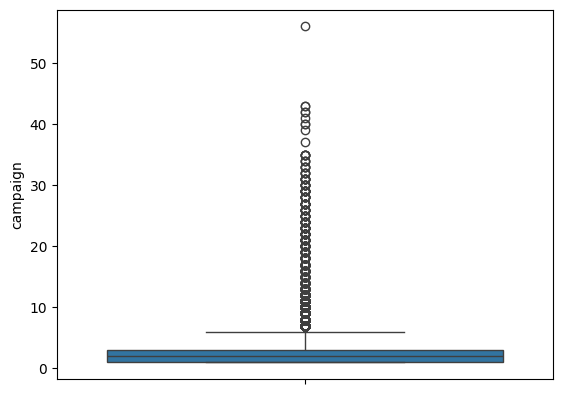

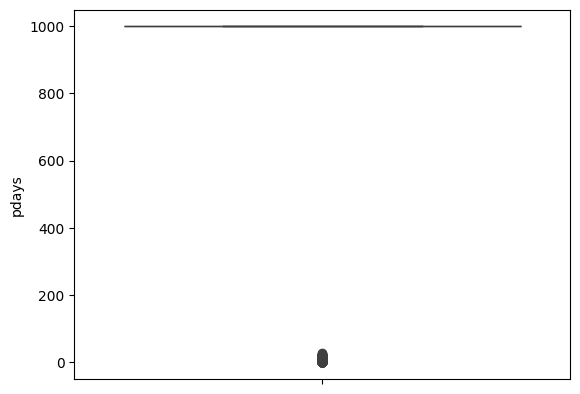

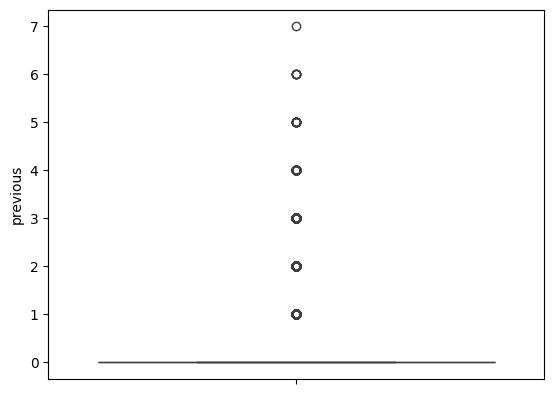

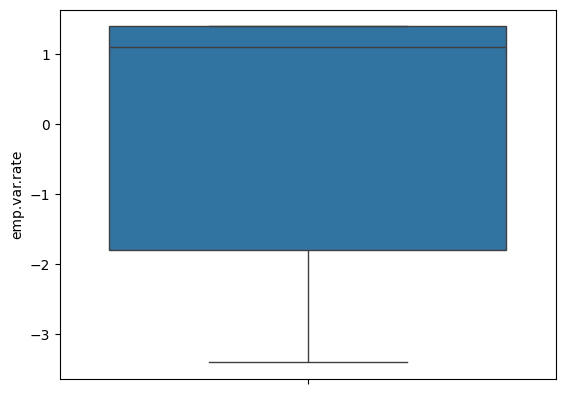

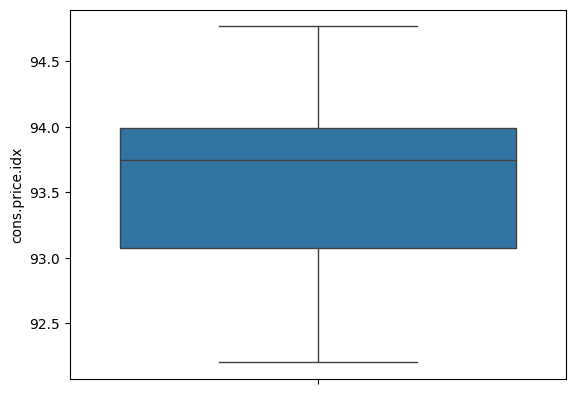

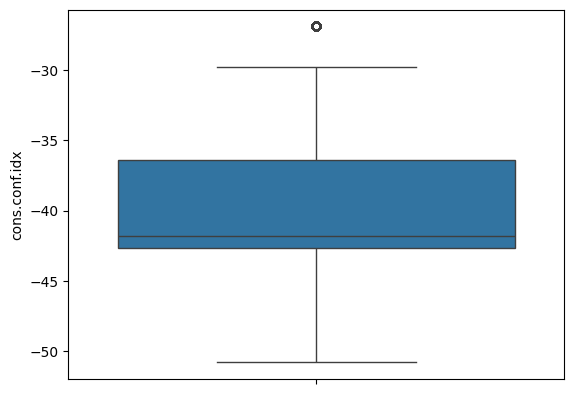

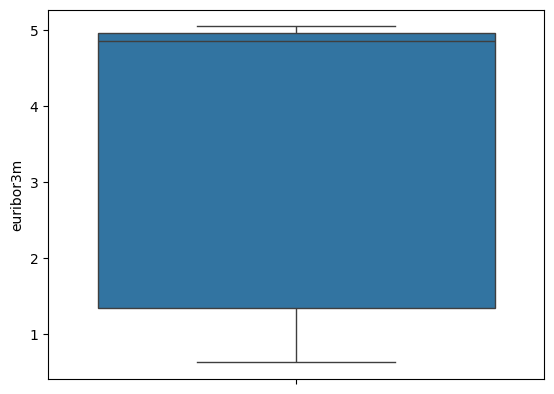

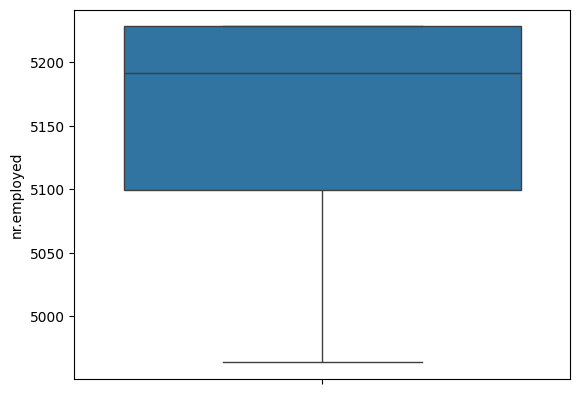

In [435]:
# Draw boxplot to check the outliners
print(numerical)
for i in numerical.columns:
  sea.boxplot(data[i])
  plt.show()


In [436]:
Q1 = numerical['age'].quantile(0.25)
print("Q1:-",Q1)
Q3 = numerical['age'].quantile(0.75)
print("Q1:-",Q3)
IQR = Q3-Q1
print("IQR:-",IQR)

Q1:- 32.0
Q1:- 47.0
IQR:- 15.0


In [437]:
Lower = (Q1-1.5*IQR)
Upper = (Q3+1.5*IQR)
print("Lower Limit is :-",Lower)
print("Upper Limit is :-",Upper)

Lower Limit is :- 9.5
Upper Limit is :- 69.5


In [438]:
numerical['age'].clip(lower=Lower, upper=Upper, inplace=True)

/tmp/ipython-input-200956491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical['age'].clip(lower=Lower, upper=Upper, inplace=True)
/tmp/ipython-input-200956491.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  numerical['age'].clip(lower=Lower, upper=Upper, inplace=True)


<Axes: ylabel='age'>

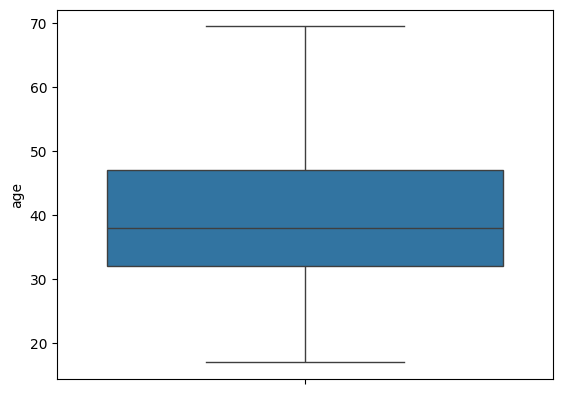

In [439]:
sea.boxplot(numerical['age'])

In [440]:
Q1 = numerical['duration'].quantile(0.25)
print("Q1:-",Q1)
Q3 = numerical['duration'].quantile(0.75)
print("Q1:-",Q3)
IQR = Q3-Q1
print("IQR:-",IQR)

Q1:- 102.0
Q1:- 319.0
IQR:- 217.0


In [441]:
Lower = (Q1-1.5*IQR)
Upper = (Q3+1.5*IQR)
print("Lower Limit is :-",Lower)
print("Upper Limit is :-",Upper)

Lower Limit is :- -223.5
Upper Limit is :- 644.5


In [442]:
numerical['duration'].clip(lower=Lower, upper=Upper, inplace=True)

/tmp/ipython-input-2003627256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical['duration'].clip(lower=Lower, upper=Upper, inplace=True)
/tmp/ipython-input-2003627256.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '644.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  numerical['duration'].clip(lower=Lower, upper=Upper, inplace=True)


<Axes: ylabel='duration'>

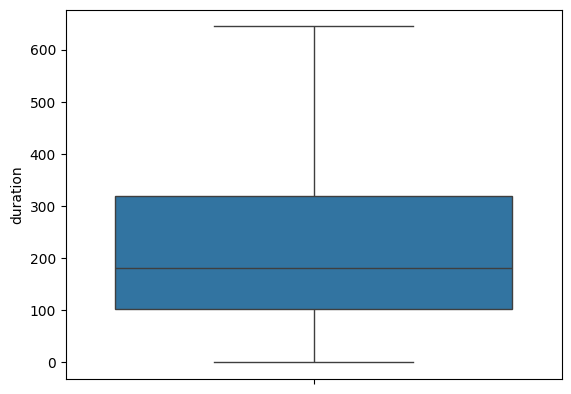

In [443]:
sea.boxplot(numerical['duration'])

In [444]:
Q1 = numerical['campaign'].quantile(0.25)
print("Q1:-",Q1)
Q3 = numerical['campaign'].quantile(0.75)
print("Q1:-",Q3)
IQR = Q3-Q1
print("IQR:-",IQR)

Q1:- 1.0
Q1:- 3.0
IQR:- 2.0


In [445]:
Lower = (Q1-1.5*IQR)
Upper = (Q3+1.5*IQR)
print("Lower Limit is :-",Lower)
print("Upper Limit is :-",Upper)

Lower Limit is :- -2.0
Upper Limit is :- 6.0


In [446]:
numerical['campaign'].clip(lower=Lower, upper=Upper, inplace=True)

/tmp/ipython-input-211881138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical['campaign'].clip(lower=Lower, upper=Upper, inplace=True)


<Axes: ylabel='campaign'>

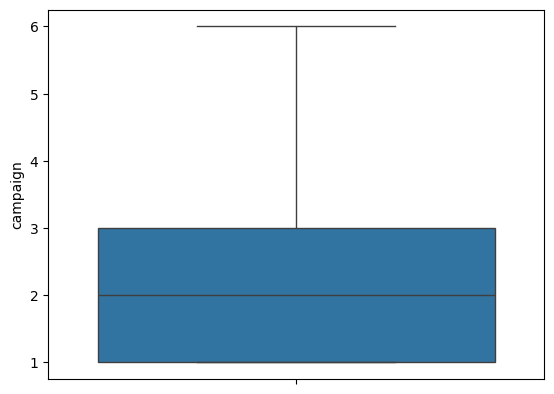

In [447]:
sea.boxplot(numerical['campaign'])

In [448]:
Q1 = numerical['cons.conf.idx'].quantile(0.25)
print("Q1:-",Q1)
Q3 = numerical['cons.conf.idx'].quantile(0.75)
print("Q1:-",Q3)
IQR = Q3-Q1
print("IQR:-",IQR)

Q1:- -42.7
Q1:- -36.4
IQR:- 6.300000000000004


In [449]:
Lower = (Q1-1.5*IQR)
Upper = (Q3+1.5*IQR)
print("Lower Limit is :-",Lower)
print("Upper Limit is :-",Upper)

Lower Limit is :- -52.150000000000006
Upper Limit is :- -26.949999999999992


In [450]:
numerical['cons.conf.idx'].clip(lower=Lower, upper=Upper, inplace=True)

/tmp/ipython-input-2083410795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical['cons.conf.idx'].clip(lower=Lower, upper=Upper, inplace=True)


<Axes: ylabel='cons.conf.idx'>

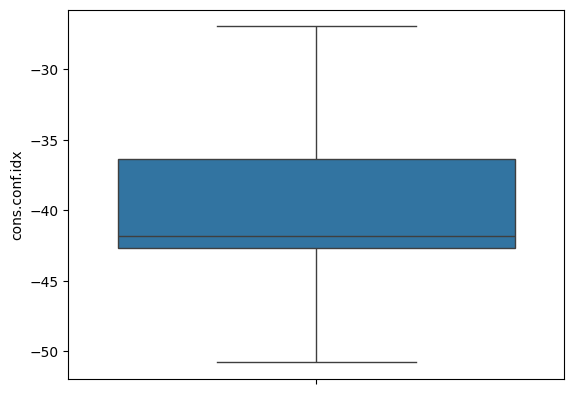

In [451]:
sea.boxplot(numerical['cons.conf.idx'])

Handiled outliners , now we check the skewness

In [452]:
for i in numerical:
  print("Skewness of ",i,"is",numerical[i].skew())

Skewness of  age is 0.5673961492615673
Skewness of  duration is 1.0446884076408367
Skewness of  campaign is 1.211974233852984
Skewness of  pdays is -4.921386382079702
Skewness of  previous is 3.831395514122408
Skewness of  emp.var.rate is -0.7240605917385105
Skewness of  cons.price.idx is -0.23085290676680506
Skewness of  cons.conf.idx is 0.30051406243977435
Skewness of  euribor3m is -0.7091942125590542
Skewness of  nr.employed is -1.0443170571755054


In [453]:
numerical['duration']= np.sqrt(numerical['duration'])
numerical['campaign']= np.sqrt(numerical['campaign'])
numerical['pdays']= np.exp(numerical['pdays'])
numerical['previous']= np.log1p(numerical['previous'])
numerical['emp.var.rate']= numerical['previous']**2
numerical['euribor3m']= numerical['euribor3m']**2
numerical['nr.employed']= numerical['nr.employed']**2

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [454]:
for i in numerical:
  print("Skewness of ",i,"is",numerical[i].skew())

Skewness of  age is 0.5673961492615673
Skewness of  duration is 0.39596443256494335
Skewness of  campaign is 0.8284859092633986
Skewness of  pdays is nan
Skewness of  previous is 2.5865105618409516
Skewness of  emp.var.rate is 4.7935601701007755
Skewness of  cons.price.idx is -0.23085290676680506
Skewness of  cons.conf.idx is 0.30051406243977435
Skewness of  euribor3m is -0.6339932876058124
Skewness of  nr.employed is -1.0252895494872891


/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [455]:
#Now let's encode the cat values
cat = data.select_dtypes('object')

In [456]:
for col in ['job', 'marital', 'education', 'housing', 'loan']:
    most_frequent = cat[col].mode()[0]
    cat[col] = cat[col].replace('unknown', most_frequent)

In [457]:
cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [458]:
cat = cat.drop(['day_of_week','month','contact'],axis=1)

In [459]:
X=pd.concat([numerical,cat], axis=1)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,poutcome,y
0,56.0,16.155494,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,housemaid,married,basic.4y,no,no,no,nonexistent,no
1,57.0,12.206556,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,services,married,high.school,unknown,no,no,nonexistent,no
2,37.0,15.033296,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,services,married,high.school,no,yes,no,nonexistent,no
3,40.0,12.288206,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,admin.,married,basic.6y,no,no,no,nonexistent,no
4,56.0,17.521415,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,services,married,high.school,no,no,yes,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,18.275667,1.000000,inf,0.000000,0.000000,94.767,-50.8,1.056784,24637324.96,retired,married,professional.course,no,yes,no,nonexistent,yes
41184,46.0,19.570386,1.000000,inf,0.000000,0.000000,94.767,-50.8,1.056784,24637324.96,blue-collar,married,professional.course,no,no,no,nonexistent,no
41185,56.0,13.747727,1.414214,inf,0.000000,0.000000,94.767,-50.8,1.056784,24637324.96,retired,married,university.degree,no,yes,no,nonexistent,no
41186,44.0,21.023796,1.000000,inf,0.000000,0.000000,94.767,-50.8,1.056784,24637324.96,technician,married,professional.course,no,no,no,nonexistent,yes


In [460]:
X['job'].value_counts()

,count
job,
admin.,10749
blue-collar,9253
technician,6739
services,3967
management,2924
retired,1718
entrepreneur,1456
self-employed,1421
housemaid,1060


In [461]:
job_target_mean = X.groupby('job')['age'].mean()
X['job'] = X['job'].map(job_target_mean)

In [462]:
X.drop(['job'],axis=1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital,education,default,housing,loan,poutcome,y
0,56.0,16.155494,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,married,basic.4y,no,no,no,nonexistent,no
1,57.0,12.206556,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,married,high.school,unknown,no,no,nonexistent,no
2,37.0,15.033296,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,married,high.school,no,yes,no,nonexistent,no
3,40.0,12.288206,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,married,basic.6y,no,no,no,nonexistent,no
4,56.0,17.521415,1.000000,inf,0.000000,0.000000,93.994,-36.4,23.590449,26946481.00,married,high.school,no,no,yes,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,18.275667,1.000000,inf,0.000000,0.000000,94.767,-50.8,1.056784,24637324.96,married,professional.course,no,yes,no,nonexistent,yes
41184,46.0,19.570386,1.000000,inf,0.000000,0.000000,94.767,-50.8,1.056784,24637324.96,married,professional.course,no,no,no,nonexistent,no
41185,56.0,13.747727,1.414214,inf,0.000000,0.000000,94.767,-50.8,1.056784,24637324.96,married,university.degree,no,yes,no,nonexistent,no
41186,44.0,21.023796,1.000000,inf,0.000000,0.000000,94.767,-50.8,1.056784,24637324.96,married,professional.course,no,no,no,nonexistent,yes


In [463]:
X['education'].value_counts()

,count
education,
university.degree,13894
high.school,9512
basic.9y,6045
professional.course,5240
basic.4y,4176
basic.6y,2291
illiterate,18


In [464]:
cat_colum = X.select_dtypes('object').columns

In [465]:
cat_colum

Index(['marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y'], dtype='object')

In [466]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',drop='first', sparse_output=False)  # sparse=False forces dense output
X_cat = ohe.fit_transform(X[cat_colum])
#Here we are creating a table that' swhy to get all column name we have given get_feature_names_out(cat_column)
X_cat = pd.DataFrame(X_cat, columns=ohe.get_feature_names_out(cat_colum), index=X.index)

In [467]:
X_cat

,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success,y_yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
41184,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
41186,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [468]:
y = X_cat['y_yes']
X_cat =X_cat.drop(['y_yes'],axis=1)

In [469]:
Num_col= X.select_dtypes('number').columns
Num_col = Num_col.drop('pdays')

In [470]:
X_final = pd.concat([X[Num_col], X_cat], axis=1)

X_final.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success
0,56.0,16.155494,1.0,0.0,0.0,93.994,-36.4,23.590449,26946481.0,45.295755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57.0,12.206556,1.0,0.0,0.0,93.994,-36.4,23.590449,26946481.0,37.925637,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37.0,15.033296,1.0,0.0,0.0,93.994,-36.4,23.590449,26946481.0,37.925637,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,40.0,12.288206,1.0,0.0,0.0,93.994,-36.4,23.590449,26946481.0,38.407852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56.0,17.521415,1.0,0.0,0.0,93.994,-36.4,23.590449,26946481.0,37.925637,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [471]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_final[Num_col] = scaler.fit_transform(X[Num_col])
X_final


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success
0,1.585672,0.337003,-0.917134,-0.381474,-0.321856,0.722628,0.886990,0.713496,0.327859,1.094332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.684402,-0.362244,-0.917134,-0.381474,-0.321856,0.722628,0.886990,0.713496,0.327859,-0.411377,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.290190,0.138293,-0.917134,-0.381474,-0.321856,0.722628,0.886990,0.713496,0.327859,-0.411377,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.005999,-0.347786,-0.917134,-0.381474,-0.321856,0.722628,0.886990,0.713496,0.327859,-0.312861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.585672,0.578869,-0.917134,-0.381474,-0.321856,0.722628,0.886990,0.713496,0.327859,-0.411377,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.918521,0.712426,-0.917134,-0.381474,-0.321856,2.058076,-2.225706,-1.439241,-2.787541,4.139780,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41184,0.598377,0.941685,-0.917134,-0.381474,-0.321856,2.058076,-2.225706,-1.439241,-2.787541,-0.078608,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,1.585672,-0.089346,-0.039316,-0.381474,-0.321856,2.058076,-2.225706,-1.439241,-2.787541,4.139780,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
41186,0.400917,1.199043,-0.917134,-0.381474,-0.321856,2.058076,-2.225706,-1.439241,-2.787541,-0.292276,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Logistic Regression

In [472]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [473]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y)

In [474]:
X_train.shape

(30882, 24)

In [475]:
y_train.shape

(30882,)

In [476]:
X_test.shape

(10294, 24)

In [477]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [478]:
y_pred = logreg.predict(X_test)


In [479]:
y_test

,y_yes
40680,0.0
34293,0.0
30425,0.0
7567,0.0
20871,0.0
...,...
17050,0.0
26852,0.0
13896,0.0
24153,0.0


In [480]:
accuracy_score(y_test,y_pred)

0.9071303672041966

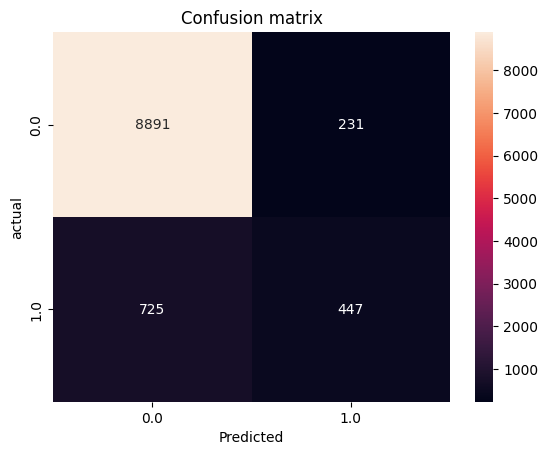

In [481]:
cm = confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
sea.heatmap(cm,annot=True,xticklabels=y.unique(),yticklabels=y.unique(),fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("Confusion matrix")
plt.show()

In [482]:
cr = classification_report(y_test,y_pred)
print("Classification Report :-")
print(cr)

Classification Report :-
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      9122
         1.0       0.66      0.38      0.48      1172

    accuracy                           0.91     10294
   macro avg       0.79      0.68      0.72     10294
weighted avg       0.89      0.91      0.90     10294



# K-Nearest Neighbors (kNN)

In [483]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) #tuning (best parameters)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [484]:
# Predict on the test set
knn_y_pred = knn.predict(X_test)
knn_y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [485]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,knn_y_pred)

0.8990674179133475

In [486]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      9122
         1.0       0.58      0.41      0.48      1172

    accuracy                           0.90     10294
   macro avg       0.75      0.68      0.71     10294
weighted avg       0.89      0.90      0.89     10294



# Support Vector Classifier

In [487]:
from sklearn.svm import SVC
# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test,svm_y_pred)
print(f'SVM Accuracy: {accuracy}')

SVM Accuracy: 0.9063532154653196


# DECISION TREE

In [488]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, dt_y_pred))

Accuracy: 0.8892558772100253


In [489]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      9122
         1.0       0.51      0.50      0.51      1172

    accuracy                           0.89     10294
   macro avg       0.73      0.72      0.72     10294
weighted avg       0.89      0.89      0.89     10294



# Random Forest

In [490]:
from sklearn.ensemble import RandomForestClassifier
#log.regg=linearmodel, knn=neighbours ,dt=tree
#ensemble:together/ collection of dt
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9111132698659413


# Boosting models (AdaBoost / Gradient Boosting)

In [491]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create a Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
gra_y_pred = gradient_boosting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, gra_y_pred)
print(f'Accuracy of Gradient Boosting: {accuracy:.2f}')

Accuracy of Gradient Boosting: 0.91


In [492]:
from sklearn.ensemble import RandomForestClassifier
# Create an AdaBoost model with a Decision Tree as the weak learner
adaboost_model = RandomForestClassifier()

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set

ada_y_pred = adaboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, ada_y_pred)
print(f'Accuracy of AdaBoost: {accuracy:.2f}')

Accuracy of AdaBoost: 0.91


In [493]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

predictions = {
    "KNN": knn_y_pred,
    "Decision Tree": dt_y_pred,
    "Random Forest": rf_y_pred,
    "AdaBoost": ada_y_pred,
    "Gradient Boosting": gra_y_pred,
    "SVM": svm_y_pred,
}

# Initialize a dictionary to store metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Compute metrics for each model
for model_name, y_pred in predictions.items():
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='macro'))
    results["Recall"].append(recall_score(y_test, y_pred, average='macro'))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='macro'))

results

{'Model': ['KNN',
  'Decision Tree',
  'Random Forest',
  'AdaBoost',
  'Gradient Boosting',
  'SVM'],
 'Accuracy': [0.8990674179133475,
  0.8892558772100253,
  0.9111132698659413,
  0.911696133670099,
  0.914319020788809,
  0.9063532154653196],
 'Precision': [0.753870058408317,
  0.7251159142921024,
  0.7900822089120381,
  0.7940313942219551,
  0.8001107520977107,
  0.814542284248854],
 'Recall': [0.6842709707544226,
  0.7207492780832896,
  0.728248587782004,
  0.7233721423584583,
  0.7363781481667169,
  0.6407904080672088],
 'F1-Score': [0.7111412281761447,
  0.7228996742846375,
  0.7539630415213766,
  0.7519440151008759,
  0.7629383885265968,
  0.6841736345211785]}

In [494]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)


# Display the results
print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score
0                KNN  0.899067   0.753870  0.684271  0.711141
1      Decision Tree  0.889256   0.725116  0.720749  0.722900
2      Random Forest  0.911113   0.790082  0.728249  0.753963
3           AdaBoost  0.911696   0.794031  0.723372  0.751944
4  Gradient Boosting  0.914319   0.800111  0.736378  0.762938
5                SVM  0.906353   0.814542  0.640790  0.684174


In [495]:
results_df = results_df.sort_values(by="F1-Score",ascending=False)
print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score
4  Gradient Boosting  0.914319   0.800111  0.736378  0.762938
2      Random Forest  0.911113   0.790082  0.728249  0.753963
3           AdaBoost  0.911696   0.794031  0.723372  0.751944
1      Decision Tree  0.889256   0.725116  0.720749  0.722900
0                KNN  0.899067   0.753870  0.684271  0.711141
5                SVM  0.906353   0.814542  0.640790  0.684174


1) The best model is Gradient Boosting,since it has a more accuracy compared to other models